In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [39]:
data = pd.read_csv('creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Text(0, 0.5, 'Frequency')

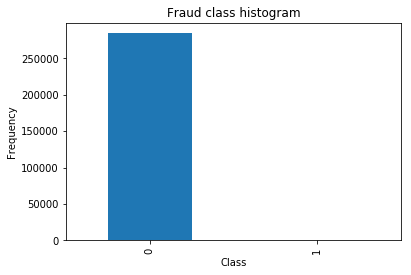

In [45]:
count_classess = pd.value_counts(data['Class'],sort=True)
count_classess.plot(kind = 'bar')
plt.title('Fraud class histogram')
plt.xlabel('Class')
plt.ylabel('Frequency')

In [42]:
from sklearn.preprocessing import StandardScaler
#StandardScaler作用：去均值和方差归一化。且是针对每一个特征维度来做的，而不是针对样本。 
data['normAmount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1, 1))
data = data.drop(['Time','Amount'],axis=1)

In [43]:
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


In [6]:
X = data.loc[:,data.columns != 'Class']
y = data.loc[:,data.columns =='Class']
#得到label为1的数据长度
number_records_fraud = len(data[data.Class == 1])
#得到label为1的数据索引
fraud_indices = np.array(data[data.Class == 1].index)
#得到label为0的数据索引
normal_indices = np.array(data[data.Class == 0].index)
#在label为0d的数据中随机选取number_records_fraud个数据下标
random_normal_indices = np.random.choice(normal_indices, number_records_fraud, replace = False)
random_normal_indices = np.array(random_normal_indices)
#合并两种样本
under_sample_indices = np.concatenate([fraud_indices,random_normal_indices])
#下取样
under_sample_data = data.iloc[under_sample_indices,:]

X_undersample = under_sample_data.loc[:, under_sample_data.columns != 'Class']
y_undersample = under_sample_data.loc[:, under_sample_data.columns == 'Class']

# 显示数据占比
print("Percentage of normal transactions: ", len(under_sample_data[under_sample_data.Class == 0])/len(under_sample_data))
print("Percentage of fraud transactions: ", len(under_sample_data[under_sample_data.Class == 1])/len(under_sample_data))
print("Total number of transactions in resampled data: ", len(under_sample_data))

Percentage of normal transactions:  0.5
Percentage of fraud transactions:  0.5
Total number of transactions in resampled data:  984


In [7]:
from sklearn.model_selection import train_test_split
#所有数据集
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3, random_state = 0)

print("Number transactions train dataset: ", len(X_train))
print("Number transactions test dataset: ", len(X_test))
print("Total number of transactions: ", len(X_train)+len(X_test))
#下取样数据集
X_train_undersample, X_test_undersample, y_train_undersample, y_test_undersample = train_test_split(X_undersample
                                                                                                   ,y_undersample
                                                                                                   ,test_size = 0.3
                                                                                                   ,random_state = 0)
print("")
print("Number transactions train dataset: ", len(X_train_undersample))
print("Number transactions test dataset: ", len(X_test_undersample))
print("Total number of transactions: ", len(X_train_undersample)+len(X_test_undersample))

Number transactions train dataset:  199364
Number transactions test dataset:  85443
Total number of transactions:  284807

Number transactions train dataset:  688
Number transactions test dataset:  296
Total number of transactions:  984


In [8]:
#recall = TP/(TP+FN)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold,cross_val_score
from sklearn.metrics import confusion_matrix,recall_score,classification_report

In [14]:
def printing_Kfold_scores(x_train_data,y_train_data):
    #k折交叉验证
    fold = KFold(n_splits=5,shuffle=False)
    #不同的C参数
    c_param_range = [0.01,0.1,1,10,100]
    
    results_table = pd.DataFrame(index = range(len(c_param_range),2), columns = ['C_parameter','Mean recall score'])
    results_table['C_parameter'] = c_param_range
    
    #k折操作将会给出两个列表：train_indices = indices[0], test_indices = indices[1]
    j = 0
    for c_param in c_param_range:
        print('-------------------------------------------')
        print('C parameter: ', c_param)
        print('-------------------------------------------')
        print('')
        
        recall_accs = []
        #enumerate() 函数用于将一个可遍历的数据对象(如列表、元组或字符串)组合为一个索引序列，同时列出数据和数据下标，一般用在 for 循环当中。
        for iteration,indices in enumerate(fold.split(x_train_data)):
            #把c_param_range代入到逻辑回归模型中，并使用了l1正则化
            lr = LogisticRegression(C = c_param,penalty = 'l1',solver='liblinear')
            #使用indices[0]的数据进行拟合曲线，使用indices[1]的数据进行误差测试
            lr.fit(x_train_data.iloc[indices[0],:],y_train_data.iloc[indices[0],:].values.ravel())
            #在indices[1]数据上预测值
            y_pred_undersample = lr.predict(x_train_data.iloc[indices[1],:].values)
            #根据不同的c_parameter计算召回率
            recall_acc = recall_score(y_train_data.iloc[indices[1],:].values,y_pred_undersample)
            recall_accs .append(recall_acc)
            print('Iteration ', iteration,': recall score = ', recall_acc)
        #求出我们想要的召回平均值
        results_table.loc[j,'Mean recall score'] = np.mean(recall_accs)
        j += 1
        print('')
        print('Mean recall score ', np.mean(recall_accs))
        print('')
    best_c = results_table.loc[results_table['Mean recall score'].values.argmax()]['C_parameter']
    #最后选择最好的 C parameter
    print('*********************************************************************************')
    print('Best model to choose from cross validation is with C parameter = ', best_c)
    print('*********************************************************************************')
    
    return best_c

In [15]:
best_c = printing_Kfold_scores(X_train_undersample,y_train_undersample)

-------------------------------------------
C parameter:  0.01
-------------------------------------------

Iteration  0 : recall score =  0.958904109589041
Iteration  1 : recall score =  0.9178082191780822
Iteration  2 : recall score =  1.0
Iteration  3 : recall score =  1.0
Iteration  4 : recall score =  0.9696969696969697

Mean recall score  0.9692818596928185

-------------------------------------------
C parameter:  0.1
-------------------------------------------

Iteration  0 : recall score =  0.8356164383561644
Iteration  1 : recall score =  0.863013698630137
Iteration  2 : recall score =  0.9152542372881356
Iteration  3 : recall score =  0.918918918918919
Iteration  4 : recall score =  0.8939393939393939

Mean recall score  0.88534853742655

-------------------------------------------
C parameter:  1
-------------------------------------------

Iteration  0 : recall score =  0.863013698630137
Iteration  1 : recall score =  0.8904109589041096
Iteration  2 : recall score =  0.966

In [16]:
def plot_confusion_matrix(cm, classes,title='Confusion matrix',cmap=plt.cm.Blues):
    '''这个方法用来输出和画出混淆矩阵的
    '''
    #cm为数据，interpolation='nearest'使用最近邻插值，cmap颜色图谱（colormap), 默认绘制为RGB(A)颜色空间
    plt.imshow(cm,interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    #xticks(刻度下标，刻度标签)
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)
    #text()命令可以在任意的位置添加文字
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    #自动紧凑布局
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Recall metric in the testing dataset:  0.9319727891156463


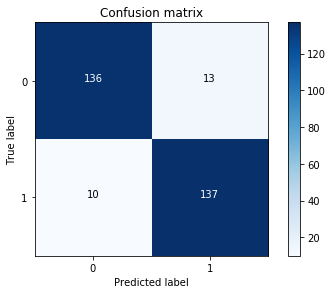

In [18]:
import itertools
# 使用下采样数据训练与测试
lr = LogisticRegression(C = best_c, penalty = 'l1',solver='liblinear')
lr.fit(X_train_undersample,y_train_undersample.values.ravel())
y_pred_undersample = lr.predict(X_test_undersample.values)
#计算混淆矩阵
cnf_matrix = confusion_matrix(y_test_undersample,y_pred_undersample)
#输出精度为小数点后两位
np.set_printoptions(precision=2)
print("Recall metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))
#画出非标准化的混淆矩阵
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix,classes=class_names,title='Confusion matrix')
plt.show()

Recall metric in the testing dataset:  0.9319727891156463


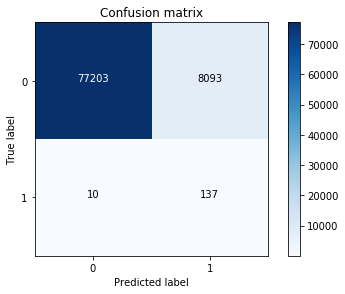

In [19]:
# 使用下采样数据进行训练，使用原始数据进行测试
lr = LogisticRegression(C = best_c, penalty = 'l1',solver='liblinear')
lr.fit(X_train_undersample,y_train_undersample.values.ravel())
y_pred = lr.predict(X_test.values)
#计算混淆矩阵
cnf_matrix = confusion_matrix(y_test,y_pred)
#输出精度为小数点后两位
np.set_printoptions(precision=2)
print("Recall metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))
#画出非标准化的混淆矩阵
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix,classes=class_names,title='Confusion matrix')
plt.show()

In [20]:
best_c = printing_Kfold_scores(X_train,y_train)

-------------------------------------------
C parameter:  0.01
-------------------------------------------

Iteration  0 : recall score =  0.4925373134328358
Iteration  1 : recall score =  0.6027397260273972
Iteration  2 : recall score =  0.6833333333333333
Iteration  3 : recall score =  0.5692307692307692
Iteration  4 : recall score =  0.45

Mean recall score  0.5595682284048672

-------------------------------------------
C parameter:  0.1
-------------------------------------------

Iteration  0 : recall score =  0.5671641791044776
Iteration  1 : recall score =  0.6164383561643836
Iteration  2 : recall score =  0.6833333333333333
Iteration  3 : recall score =  0.5846153846153846
Iteration  4 : recall score =  0.525

Mean recall score  0.5953102506435158

-------------------------------------------
C parameter:  1
-------------------------------------------

Iteration  0 : recall score =  0.5522388059701493
Iteration  1 : recall score =  0.6164383561643836
Iteration  2 : recall score

Recall metric in the testing dataset:  0.6190476190476191


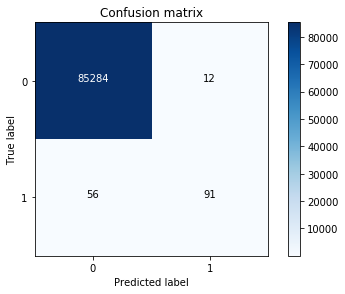

In [21]:
#使用原始数据进行训练与测试
lr = LogisticRegression(C = best_c, penalty = 'l1',solver='liblinear')
lr.fit(X_train,y_train.values.ravel())
y_pred = lr.predict(X_test.values)
#计算混淆矩阵
cnf_matrix = confusion_matrix(y_test,y_pred)
#输出精度为小数点后两位
np.set_printoptions(precision=2)
print("Recall metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))
#画出非标准化的混淆矩阵
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix,classes=class_names,title='Confusion matrix')
plt.show()

Recall metric in the testing dataset:  0.9591836734693877
Recall metric in the testing dataset:  0.9455782312925171
Recall metric in the testing dataset:  0.9319727891156463
Recall metric in the testing dataset:  0.9251700680272109
Recall metric in the testing dataset:  0.9115646258503401
Recall metric in the testing dataset:  0.8979591836734694
Recall metric in the testing dataset:  0.8843537414965986
Recall metric in the testing dataset:  0.8707482993197279
Recall metric in the testing dataset:  0.8571428571428571


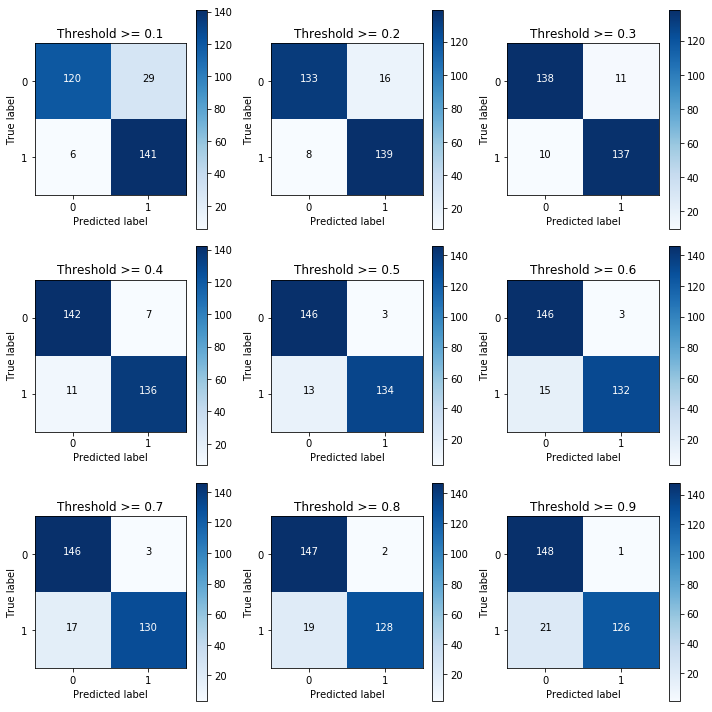

In [24]:
# 使用下采样数据训练与测试
lr = LogisticRegression(C = best_c, penalty = 'l1',solver='liblinear')
lr.fit(X_train_undersample,y_train_undersample.values.ravel())
y_pred_undersample_proba = lr.predict_proba(X_test_undersample.values)

thresholds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

plt.figure(figsize=(10,10))

j = 1
for i in thresholds:
    y_test_predictions_high_recall = y_pred_undersample_proba[:,1] > i
    
    plt.subplot(3,3,j)
    j += 1
    #计算混淆矩阵
    cnf_matrix = confusion_matrix(y_test_undersample,y_test_predictions_high_recall)
    #输出精度为小数点后两位
    np.set_printoptions(precision=2)
    print("Recall metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))
    #画出非标准化的混淆矩阵
    class_names = [0,1]
    plot_confusion_matrix(cnf_matrix,classes=class_names,title='Threshold >= %s'%i)

In [26]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [27]:
credit_cards=pd.read_csv('creditcard.csv')
columns=credit_cards.columns
# 为了获得特征列，移除最后一列标签列
features_columns=columns.delete(len(columns)-1)

features = credit_cards[features_columns]
labels=credit_cards['Class']
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.2, random_state=0)
oversampler = SMOTE(random_state=0)
os_features,os_labels = oversampler.fit_sample?(features_train,labels_train)

In [37]:
print('过采样后，1的样本的个数为：',len(os_labels[os_labels==1]))

过采样后，1的样本的个数为： 454908


In [29]:
os_features = pd.DataFrame(os_features)
os_labels = pd.DataFrame(os_labels)
best_c = printing_Kfold_scores(os_features,os_labels)

-------------------------------------------
C parameter:  0.01
-------------------------------------------

Iteration  0 : recall score =  0.8903225806451613
Iteration  1 : recall score =  0.8947368421052632
Iteration  2 : recall score =  0.968861347792409
Iteration  3 : recall score =  0.9574636462558117
Iteration  4 : recall score =  0.958189072443697

Mean recall score  0.9339146978484685

-------------------------------------------
C parameter:  0.1
-------------------------------------------

Iteration  0 : recall score =  0.8903225806451613
Iteration  1 : recall score =  0.8947368421052632
Iteration  2 : recall score =  0.9702777470399468
Iteration  3 : recall score =  0.9597388465723613
Iteration  4 : recall score =  0.9605851771248942

Mean recall score  0.9351322386975254

-------------------------------------------
C parameter:  1
-------------------------------------------

Iteration  0 : recall score =  0.8903225806451613
Iteration  1 : recall score =  0.8947368421052632
It

Recall metric in the testing dataset:  0.900990099009901


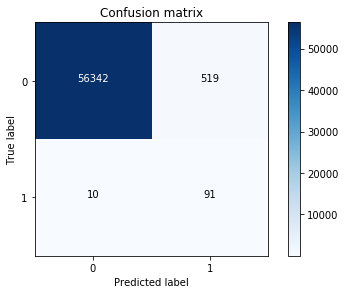

In [46]:
lr = LogisticRegression(C = best_c, penalty = 'l1',solver='liblinear')
lr.fit(os_features,os_labels.values.ravel())
y_pred = lr.predict(features_test.values)

# 计算混淆矩阵
cnf_matrix = confusion_matrix(labels_test,y_pred)
np.set_printoptions(precision=2)

print("Recall metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

# 画出非规范化的混淆矩阵
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()